# Pêcheries. 2. Modèles bio-économiques

Ce notebook est la suite du notebook **Pêcheries. 1. Modèles simples de pêche**.


On regarde maintenant un modèle économique, où pêcher des poissons coûte de l'argent (prix des bateaux), et en rapporte (vente de poissons). 

On suppose donc que l'effort coûte $c$ par unité de temps (prix de l'effort), et que les poissons pêchés sont vendus au prix $p$. Le gain total à l'instant $t$ est donc 
$$
    g(t) = p h(t) - c E(t) = E(t) \left( p x(t) - c \right).
$$

*De nouveau, on peut supposer qu'on travaille dans une échelle de prix où $c = 1$, et se débarasser de ce paramètre. Dans ce cas, le prix du poisson $p$ est le prix en "unité de prix d'effort"...)*.

Dans la suite, on pose

$$
    \boxed{ g(t) = p h(t) - E(t) = E(t) \left( p x(t) - 1 \right). }
$$

In [1]:
# on charge les bibliothèques Python
%pylab inline
figsize(8, 6)

from scipy.integrate import solve_ivp

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. La pêche en libre service

Dans notre première hypothèse, on suppose que tout le monde peut aller à la pêche. Dans ce cas, la pêche va attirer de nouvelles personnes tant que c'est rentable $(g(t) > 0)$, et ne vont pas pêcher tant que ce n'est pas rentable $(g(t) \le 0)$.


De manière équivalente, on va mettre un effort maximal $E(t) = E_{\rm max}$ tant que c'est rentable, et arrêter $E(t) = 0$ quand ce ne l'est plus.

- **Exercice** Montrer que la pêche est rentable au temps $t$ ssi $x(t) > \frac{1}{p}$ (indépendent de $E$ !)

Dans ce cas, la pêche est modélisée par la fonction
$$
    h(t) = \begin{cases}
        E_{\rm max} x(t) & \quad \text{si} \quad x(t) > \frac{1}{p}, \\
        0 & \quad \text{si} \quad x(t) \le \frac{1}{p}.
    \end{cases}
$$
et notre équation d'évolution devient
$$
    \boxed{ x'(t) = f(x(t)) \quad \text{avec} \quad
    f(t) := \begin{cases}
        x(1 - x) - E_{\rm max} x(t) & \quad \text{si} \quad x(t) > \frac{1}{p}, \\
        0 & \quad \text{si} \quad x(t) \le \frac{1}{p}.
    \end{cases} }
$$
- **Exercice** Tracer l'évolution de $x(t)$ pour $p = 3$, $E_{\rm max} = 1$, et la valeur $x_0$ de votre choix.

- **Exercice** Expliquez pourquoi, en temps long, $x(t)$ converge vers $x_p := \max \{ 1, \frac{1}{p} \}$. Que se passe-t-il si le prix est trop bas $p < 1$ ?

- **Exercice** On suppose maintenant $p > 1$. En déduire que l'effort *moyen* à fournir pour obtenir la population limite $x_p$ est $E_p := 1 - \frac{1}{p}$.
- **Exercice** Montrer que dans ce cas, la pêche moyenne est
$$
    h_p := E_p x_p = \left( 1 - \frac1p \right) \frac1p.
$$
- **Exercice** Montrer que $h_p \le \frac14$. En déduire que la pêche est toujours durable dans ce cas.


Les quantités $x_p$, $E_p$ et $h_p$ sont les équilibres **bio-économiques** (BE). Ils dépendent uniquement du prix $p$.


- **Exercice** En déduire que le prix *optimal* pour avoir la plus grande quantité de poissons sur le marché est $p = 2$ (2 fois le coût de l'effort).

- **Exercice** Quel est le gain $g(t)$ à l'équilibre ?


**Les quantités bio-économiques sont**
$$
    \boxed{x_{\rm BE} = \frac{1}{p}, \quad h_{\rm BE} = \frac{p-1}{p^2}, \quad E_{\rm BE} = \frac{p-1}{p}, \quad \text{et} \quad g_{\rm BE} = 0.  }
$$

## 2. La pêche en monopole, cas stationnaire

On suppose maintenant qu'il n'y a qu'un seul acteur qui pêche, qui peut décider très précisement l'effort $E(t)$. Son but est de gagner le plus d'argent.


Pour commencer, on suppose que cet acteur veut faire un effort constant $E(t) = E$ (cas stationnaire). Dans ce cas, on a
$$
    \begin{cases}
        x' = x(1 - x) - Ex \\
        g(t) = E(p x(t) - 1)
    \end{cases}
$$

Dans le notebook précédent, on avait vu que le cas stationnaire de la première équation était $x_E = 1 - E$.

- **Exercice** Montrer que le gain stationnaire est 
$$
    g_E := E \left[ p (1 - E) - 1 \right].
$$

- **Exercice** En déduire que l'effort optimal (du point de vue économique) est 
$$
    E_* =  \dfrac{p-1}{2p} = \frac12 - \frac{1}{2p}.
$$
- **Exercice** Montrer que dans le cas optimal, la population stationnaire, la pêche stationnaire, et le gain stationnaire sont respectivement 
$$
     x_* = \frac12 + \frac{1}{2p} , \quad \text{et} \quad
     h_* = \frac14 - \frac{1}{4p^2} , \quad \text{et} \quad
     g_* = \frac{(p-1)^2}{4p}.
$$

On appelle ces quantités *Maximum Economical Yield* (MEY).

- **Exercice** Montrer que si $p \to \infty$, alors $g_* \sim \frac{p}{4}$.


- **Exercice** Montrer que $x_* > x_{\rm MSY}$, et que $h_* < \frac14$. 


**Les quantités MEY sont**
$$
    \boxed{ x_{\rm MEY} = \frac12 + \frac{1}{2p}, \quad
    h_{\rm MEY} = \frac14 - \frac{1}{4p^2}, \quad
    E_{\rm MEY} =  \frac12 - \frac{1}{2p}, \quad \text{et} \quad
    g_{\rm MEY} = \frac{(p-1)^2}{4p}.}
$$

## 3. La pêche en monopole, cas dépendant du temps


On regarde maintenant un modèle beaucoup plus complexe, qui dépend du temps !

Le but du pêcheur est d'avoir le plus d'argent **total** après un temps $T_{\rm max}$. Il peut décider de l'effort qu'il met à chaque instant $E(t)$.

> On appelle la fonction $t\mapsto E(t)$ un **contrôle**. On veut calculer un problème de **contrôle optimal**.

Le gain total est
$$
    G_{\rm tot} := \int_0^{T_{\rm max}} g(t) dt,
$$
c'est à dire la somme de tous les gains $g(t)$ à l'instant $t$. On rapelle que $g(t)$ vaut
$$
    g(t) = E(t) \big( px(t) - 1 \big), \quad \text{avec} \quad x'(t) = x(t)\big( 1-x(t) \big) - E(t) x(t).
$$

### 3.1 Gain total pour un effort $E(t, x)$ donné

**Exercice** : Écrire une fonction Python `Gtot(fctE, x0, tt, p, display=False)` qui prend en entrée
- `x0` la population initiale à l'instant $t$,
- `tt` une grille en temps de $0$ à $T_{\rm max}$,
- `p` le prix du poisson
- `fctE` un contrôle d'effort donné (une fonction qui dépend du temps et de la population $E(t, x)$)
et qui retourne
- `Gtot` le gain total intégré.

Si de plus `display = True`, la fonction doit afficher :
- la fonction `fctE` (l'effort au cours du temps)
- la fonction `x(t)` (la population de poisson au cours du temps
- la fonction `g(t)` (le gain au cours du temps).

*Indices* :
- on pourra utiliser `subplot` pour l'affichage des graphiques
- on peut intégrer avec `sum(g)*(tt[1] - tt[0])` (pourquoi ?)

### Premier cas test

Commençons par regarder ce qui se passe si $E(t, x) = E(t)$ est une fonction oscillante, par exemple
$$
    E(t, x) = \frac12 + \frac14 \cos(2\pi t).
$$

1.1632858421195107

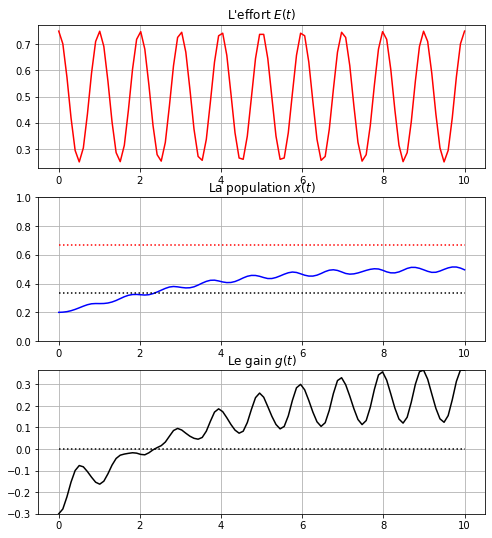

In [257]:
#test
figsize(8, 9)

Tmax = 10
tt = linspace(0, Tmax, 100)
x0 = 0.2
p = 3 #prix du poisson

def fctE_oscillante(t, x) : 
    return 1/2 + cos(2*pi*t)/4 # une fonction oscillante

Gtot(fctE_oscillante, x0, tt, p, display=True)

**Exercice** : Testez d'autres stratégies possibles. Doit-on aller pêcher si le gain est négatif (si $x < \frac{1}{p}$) ?

### 2ème cas test

On essaye maintenant la stratégie suivante :
- Si $x < x_*$, on ne pêche pas $E = 0$
- Si $x = x_*$, on pêche avec l'effort $E_*$
- Si $x > x_*$, on pêche au maximum $E = E_{\rm max}$

2.6521400788313523

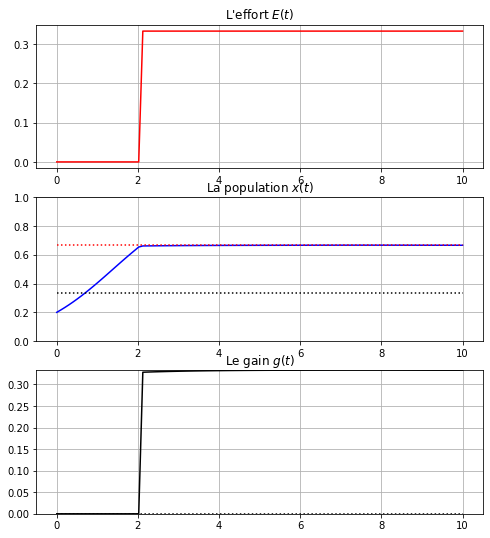

In [258]:
Tmax = 10
tt = linspace(0, Tmax, 100)
x0 = 0.2
p = 3 #prix du poisson
Emax = 3 # l'effort maximum
tol = 0.01 # une tolérance


# les quantités MEY de la section précédente
xstar = 1/2 + 1/(2*p)
Estar = 1/2 - 1/(2*p)

def fctE_MEY_strategy(t, x) : 
    if x < xstar - tol:
        return 0
    elif abs(x - xstar) < tol:
        return Estar
    else :
        return Emax
    
Gtot(fctE_MEY_strategy, x0, tt, p, display=True)

### 3.2 Résolution théorique de la stratégie optimale

On peut résoudre théoriquement notre problème de contrôle optimal.  On veut calculer, avec $f(x) := x(1 - x)$, le problème de maximisation
$$
    \boxed{ \max \left\{  \int_0^{T_{\rm max}} g(t) dt, \quad 
    \begin{cases}
        g(t) = E(t) \big( px(t) - 1 \big) \\
        x'(t) = f(x(t)) - E(t) x(t).
    \end{cases} \right\}. }
$$

La quantité intégrée peut se réécrire comme
$$
   G_{\rm tot} = \int_0^{T_{\rm max}} g(t) dt 
     = \int_0^{T_{\rm max}} E(t) \big( px(t) - 1 \big) dt
    = \int_0^{T_{\rm max}} E(t) x(t) \left( p - \frac{1}{x(t)} \right) dt
$$
puis
$$
    G_{\rm tot} = \int_0^{T_{\rm max}} f(x(t)) \left( p - \frac{1}{x(t)} \right) - \int_0^{T_{\rm max}} x'(t) \left( p - \frac{1}{x(t)} \right) dt.
$$

La **deuxième intégrale** peut s'intégrer directement, et on a
$$
    - \int_0^{T_{\rm max}} x'(t) \left( p - \frac{1}{x(t)} \right) dt
     = p \left[ x(0) - x(T_{\rm max}) \right] + \log \left[ \dfrac{x(T_{\rm max})}{x(0)} \right].
$$
C'est une quantité qui ne dépend que des conditions de bords. Ce terme dit essentiellement qu'il faut *vider les stocks* juste avant $T_{\rm max}$.

> Si on a un horizon de temps ($T_{\rm max}$ est connu), on a économiquement intérêt à tout vider avant de partir...


Regardons maintenant la **deuxième intégrale**. Dans un régime stationnaire, cette intégrale est maximumale lorsque $x$ optimise l'intégrande
$$
    x  = x_{\rm opt} := {\rm argmax} \left[ f(x) \left( p - \frac{1}{x} \right) \right].
$$

**Exercice :** Dans le cas $f(x) = x(1 - x)$, montrer que l'optimum est réalisé pour $x = x_* = x_{\rm MEY} = \frac12 + \frac{1}{2p}$.


> Pour résumer la stratégie optimale consiste à, 1/ ammener le stock de poissons le plus vite possible vers son équilibre MEY, 2/ pêcher sous le régime MEY le plus longtemps possible, et 3/ vider les stocks avant de partir.

### 3.3 Et avec une banque ?

En pratique, un pêcheur peut aussi décider de mettre son argent à la banque.

S'il place une quantité d'argent $A(t)$ au temps $t$, il récupérera $e^{ \delta (T_{\rm max} - t)} A(t)$ argent au temps $T_{\rm max}$, où on a noté
- $\delta$ le taux d'intérêt de la banque.

En intégrant sur tous les temps, on voit que l'argent récupéré total est
$$
    \boxed{ A_{\rm tot} = \int_0^{\rm T_{\rm max}} e^{ \delta (T_{\rm max} - t)} A(t) dt = e^{ \delta T_{\rm max}} \int_0^{T_{\rm max}} e^{ - \delta t} A(t) dt }.
$$

Une façon de lire cette équation est la suivante : **de l'argent qui n'est pas placé à la banque perd de la valeur à taux $\delta$**.

Un pêcheur peut donc avoir intérêt à gagner **vite** de l'argent pour le mettre la banque !

Notre nouveau modèle devient
$$
    \boxed{ \max \left\{  \int_0^{T_{\rm max}} e^{-\delta t} g(t) dt, \quad 
    \begin{cases}
        g(t) = E(t) \big( px(t) - 1 \big) \\
        x'(t) = f(x(t)) - E(t) x(t).
    \end{cases} \right\}. }
$$

**Exercice** En répétant les arguments précédents, et avec une intégration par partie, montrer que
$$
    G_{\rm tot} = \int_0^{T_{\rm max}} e^{ - \delta t} \left[ f(x) \left( p - \frac{1}{x} \right) - \tau z(x)  \right](t) d t + \text{conditions de bord}
$$
avec
$$
    z(x) \quad \text{une primitive de } \quad c(x) := p - \frac{1}{x}.
$$

**Exercice** Montrer que, dans ce cas $ f(x) = x(1 - x)$, le $x$ optimal maximise
$$
    f(x) \left( p - \frac{1}{x}\right) - \delta z(x) .
$$
et, qu'en particulier, vérifie
$$
    \left( f'(x_*) - \delta \right) \left( p - \frac{1}{x_*}\right) + f(x_*) \frac{1}{x_*^2} = 0.
$$

**Exercice** dans le cas $f(x) = x(1 - x)$, montrer que cette équation est aussi
$$
    \boxed{ 2p x_*^2 - [ p(1 - \delta) + 1]x_* - \delta = 0 }
$$

**Exercice** Tracer $\delta \mapsto x_*$ avec $p = 2$. Que se passe-t-il ?

In [259]:
p = 2

def xstar(delta, p = 2): #on résoud une équation de degré 2.
    A = 2*p
    B = -p*(1 - delta) -1
    C = -delta
    
    Delta = B**2 - 4*A*C
    
    if Delta < 0:
        print("problem, Delta est négatif")
    else:
        return (-B + sqrt(Delta))/2/A

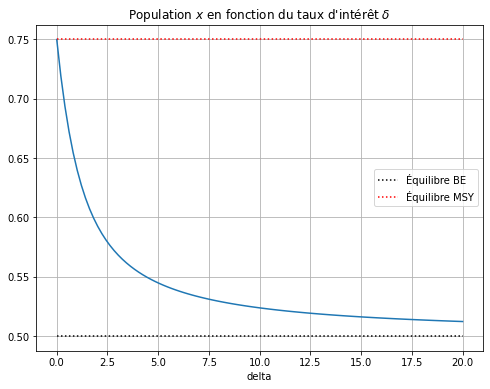

In [260]:
figsize(8, 6)

dd = linspace(0, 20, 100)

xstard = [xstar(delta) for delta in dd]
plot(dd, xstard)

plot(dd, 1/p*ones(len(dd)), ':k', label="Équilibre BE") # equilibre BE
plot(dd, (1/2 + 1/2/p)*ones(len(dd)), ':r', label="Équilibre MSY") # equilibre MSY

grid()
title("Population $x$ en fonction du taux d'intérêt $\delta$")
xlabel("delta")
legend()

Lorsque $\delta = 0$, on retrouve le cas "sans banque", et la pêche optimale est la pêche MEY. 

Lorsque $\delta \to \infty$, on est dans le sénario où juste le présent compte. Il est équivalent à la pêche en libre service (si on laisse du poisson aujourd'hui, quelqu'un d'autre ira le prendre demain). On retrouve les quantité BE à la limite $\delta \to \infty$.